<a href="https://colab.research.google.com/github/Saleti-Thrinadh-3/Machine-Learning/blob/main/Starts_up_Multyvariant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [5]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
df.describe().loc['mean']

R&D Spend           73721.6156
Administration     121344.6396
Marketing Spend    211025.0978
Profit             112012.6392
Name: mean, dtype: float64

<Axes: >

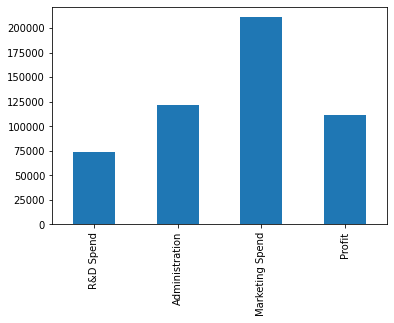

In [9]:
df.describe().loc['mean'].plot.bar()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


<ipython-input-11-18a603288d1c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['Profit'],bins=20)


<Axes: xlabel='Profit', ylabel='Density'>

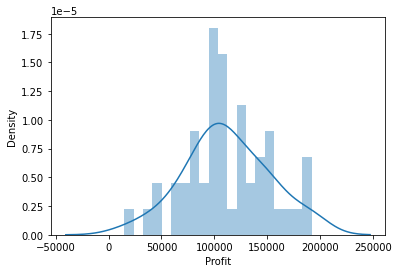

In [11]:
sb.distplot(df['Profit'],bins=20)

<Axes: >

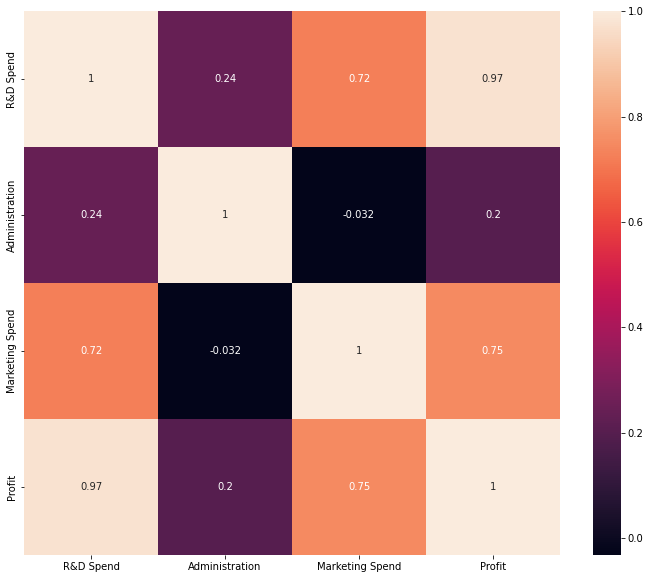

In [12]:
plt.figure(figsize=(12,10))
sb.heatmap(df.corr(),annot=True)
#the R&D Spend is more effect for output

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
label=le.fit_transform(df['State'])
label

array([2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2,
       1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2,
       0, 2, 1, 0, 2, 0])

In [14]:
df.drop('State',axis=1,inplace=True)


In [15]:
df['State']=label

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
 4   State            50 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 2.1 KB


In [17]:
x=df.drop('Profit',axis=1).values
y=df['Profit'].values

In [18]:
x.shape,y.shape

((50, 4), (50,))

In [19]:
y=y.reshape(-1,1)
y.shape

(50, 1)

In [20]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=15)

In [21]:
xtrain.shape,xtest.shape

((35, 4), (15, 4))

In [22]:
reg=linear_model.LinearRegression()
reg.fit(xtrain,ytrain)

LinearRegression()

In [23]:
ypred=reg.predict(xtrain)
print('MAE = ',mean_absolute_error(ytrain,ypred))
print('MSE = ',mean_squared_error(ytrain,ypred))
print('RMSE = ',np.sqrt(mean_squared_error(ytrain,ypred)))
print('R2_score = ',r2_score(ytrain,ypred))

MAE =  5778.990990428632
MSE =  73407239.15343203
RMSE =  8567.802469328528
R2_score =  0.9601713331799726


In [24]:
ypred1=reg.predict(xtest)
print('MAE = ',mean_absolute_error(ytest,ypred1))
print('MSE = ',mean_squared_error(ytest,ypred1))
print('RMSE = ',np.sqrt(mean_squared_error(ytest,ypred1)))
print('R2_score = ',r2_score(ytest,ypred1))

MAE =  9241.31153921639
MSE =  126281120.37230662
RMSE =  11237.48728018442
R2_score =  0.8668069175006496


In [29]:
#L1 regression
from sklearn.linear_model import Lasso
reg1=Lasso(alpha=0.2)
reg1.fit(xtrain,ytrain)

Lasso(alpha=0.2)

In [30]:
L1pred=reg1.predict(xtrain)
print('MAE = ',mean_absolute_error(ytrain,L1pred))
print('MSE = ',mean_squared_error(ytrain,L1pred))
print('RMSE = ',np.sqrt(mean_squared_error(ytrain,L1pred)))
print('R2_Score = ',r2_score(ytrain,L1pred))

MAE =  5779.039022971949
MSE =  73407239.21117537
RMSE =  8567.802472698315
R2_Score =  0.9601713331486428


In [31]:
L1pred1=reg1.predict(xtest)
print('MAE = ',mean_absolute_error(ytest,L1pred1))
print('MSE = ',mean_squared_error(ytest,L1pred1))
print('RMSE = ',np.sqrt(mean_squared_error(ytest,L1pred1)))
print('R2_score = ',r2_score(ytest,L1pred1))

MAE =  9241.23637998252
MSE =  126278896.26909515
RMSE =  11237.388320650629
R2_score =  0.866809263339534


In [33]:
#L2 regression
from sklearn.linear_model import Ridge
reg2=Ridge(alpha=0.9)
reg2.fit(xtrain,ytrain)

Ridge(alpha=0.9)

In [34]:
L2pred=reg2.predict(xtrain)
print('MAE = ',mean_absolute_error(ytrain,L2pred))
print('MSE = ',mean_squared_error(ytrain,L2pred))
print('RMSE = ',np.sqrt(mean_squared_error(ytrain,L2pred)))
print('R2_score = ',r2_score(ytrain,L2pred))

MAE =  5788.197544673899
MSE =  73409360.60423017
RMSE =  8567.92627210518
R2_score =  0.9601701821414921


In [35]:
L2pred1=reg2.predict(xtest)
print('MAE = ',mean_absolute_error(ytest,L2pred1))
print('MSE = ',mean_squared_error(ytest,L2pred1))
print('RMSE = ',np.sqrt(mean_squared_error(ytest,L2pred1)))
print('R2_score = ',r2_score(ytest,L2pred1))

MAE =  9226.906094245502
MSE =  125856768.49623479
RMSE =  11218.590307887831
R2_score =  0.8672544961590568
